In [1]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import pandas as pd
import scipy.stats
from scipy.interpolate import make_smoothing_spline

In [2]:
path = '../tmp'
ticker = '8035'
date = '2024-06-11'
pkl = '%s/%s_%s.pkl' % (path, ticker, date)
df = pd.read_pickle(pkl)
df

,Price
2024-06-11 09:00:04,35410.0
2024-06-11 09:00:09,35390.0
2024-06-11 09:00:16,35410.0
2024-06-11 09:00:22,35460.0
2024-06-11 09:00:28,35400.0
...,...
2024-06-11 14:59:34,35550.0
2024-06-11 14:59:44,35520.0
2024-06-11 14:59:50,35530.0
2024-06-11 14:59:55,35520.0


In [3]:
date_str = str(df.index[0].date())
t_start_1 = pd.to_datetime(date_str + ' 09:00:00')
t_start_2 = pd.to_datetime(date_str + ' 10:00:00')
t_mid = pd.to_datetime(date_str + ' 12:00:00')
print(type(t_mid))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
df1 = df.loc[df.index[df.index < t_mid]]
df2 = df.loc[df.index[df.index > t_mid]]

In [5]:
df11 = df1.copy()
df11.index = [(t - t_start_1).total_seconds() for t in df1.index]
df11

,Price
4.0,35410.0
9.0,35390.0
16.0,35410.0
22.0,35460.0
28.0,35400.0
...,...
8963.0,35540.0
8971.0,35540.0
8985.0,35550.0
8990.0,35550.0


In [6]:
df21 = df2.copy()
df21.index = [(t - t_start_2).total_seconds() for t in df2.index]
df21

,Price
9004.0,35570.0
9005.0,35590.0
9014.0,35580.0
9021.0,35580.0
9026.0,35570.0
...,...
17974.0,35550.0
17984.0,35520.0
17990.0,35530.0
17995.0,35520.0


In [7]:
df3 = pd.concat([df11, df21])
df3

,Price
4.0,35410.0
9.0,35390.0
16.0,35410.0
22.0,35460.0
28.0,35400.0
...,...
17974.0,35550.0
17984.0,35520.0
17990.0,35530.0
17995.0,35520.0


In [8]:
dict_data = dict()
n = len(df3)
for idx in range(n):
    series = df3.iloc[idx]
    value = series.iloc[0]
    key = series.name
    dict_data[key] = value

In [9]:
df0 = pd.DataFrame({'Price': dict_data.values()}, index=dict_data.keys())
df0

,Price
4.0,35410.0
9.0,35390.0
16.0,35410.0
22.0,35460.0
28.0,35400.0
...,...
17974.0,35550.0
17984.0,35520.0
17990.0,35530.0
17995.0,35520.0


In [10]:
x = df0.index
y = scipy.stats.zscore(df0['Price'])

t_start_0 = 0
t_end_0 = 18000
t_interval_0 = 30

spl = make_smoothing_spline(x, y)
xs = np.linspace(t_start_0, t_end_0, int((t_end_0 - t_start_0) / t_interval_0))
type(spl(xs))

numpy.ndarray

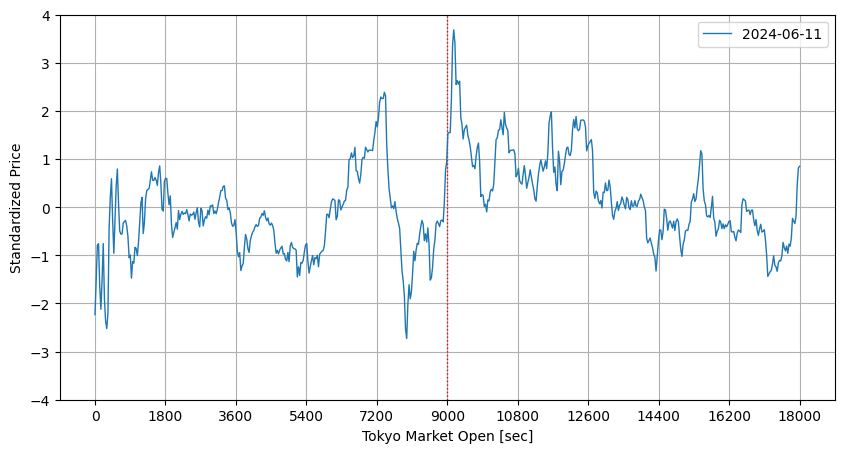

In [11]:
plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

ax.axvline(x=9000, linestyle='dotted', lw=1, c='red')

ax.set_xlabel('Tokyo Market Open [sec]')
ax.set_ylabel('Standardized Price')

ax.xaxis.set_ticks(np.arange(0, 18001, 1800))
ax.set_ylim(-4, 4)

#ax.scatter(x, y, s=1, c='gray')
ax.plot(xs, spl(xs), lw=1, label=date)
ax.grid()
ax.legend(loc='best')

plt.show()